In [14]:
from googleapiclient.discovery import build
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
api_key = '<API_KEY>' 
youtube = build('youtube', 'v3', developerKey=api_key)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
video_id = '3XiJrn_8F9Q'  
comments = []
next_page_token = None

while True:
    response = youtube.commentThreads().list(
        part='snippet',
        videoId=video_id,
        maxResults=100,
        pageToken=next_page_token
    ).execute()

    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
        comments.append(comment)

    next_page_token = response.get('nextPageToken')

    if not next_page_token:
        break


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
df = pd.DataFrame({'Comment': comments})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Comment
0,You&#39;re so passionate about teaching and it...
1,Change train_batch_size to lower value like 6 ...
2,Can u tell me how to install cdqa In colab
3,Great tutorial. Could anybody share the link t...
4,"Context, can answer, index at which answer is ..."


In [19]:
#checking the NULL values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Comment    0
dtype: int64

In [20]:
#Text Preprocessing

import re

# Remove punctuation
df['Comment_processed'] = df['Comment'].map(lambda x: re.sub('[,\.!?]', '', x))

#Remove html tags

df['Comment_processed'] = df['Comment_processed'].map(lambda x: re.sub('<[^>]+>', '', x))

# Lowercase
df['Comment_processed'] = df['Comment_processed'].map(lambda x: x.lower())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:6: DeprecationWarning: invalid escape sequence '\.'
<>:6: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-20-d594476b6f3b>:6: DeprecationWarning: invalid escape sequence '\.'
  df['Comment_processed'] = df['Comment'].map(lambda x: re.sub('[,\.!?]', '', x))


In [21]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Comment,Comment_processed
0,You&#39;re so passionate about teaching and it...,you&#39;re so passionate about teaching and it...
1,Change train_batch_size to lower value like 6 ...,change train_batch_size to lower value like 6 ...
2,Can u tell me how to install cdqa In colab,can u tell me how to install cdqa in colab
3,Great tutorial. Could anybody share the link t...,great tutorial could anybody share the link to...
4,"Context, can answer, index at which answer is ...",context can answer index at which answer is av...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


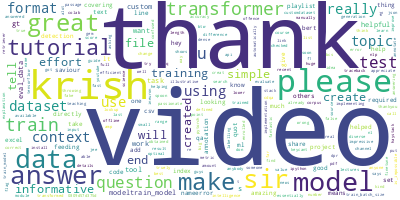

In [22]:
#Exploratory Data Analysis

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed comments together.
long_string = ','.join(list(df['Comment_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [28]:
#Prepare data for LDA

import gensim
from gensim.utils import simple_preprocess
import nltk

#Download Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#Add some generic words to stopwords for removal
stop_words.extend(['from', 're', 'edu', 'use','thank','br','please','answer', 'sir', 'video','thanks'])

#Word Tokenization and punctuation removal
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

#Remove Stopwords function definition
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

#get the list of values             
data = df.Comment_processed.values.tolist()

#pass the list of sentences to function
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['passionate', 'teaching', 'shows', 'tutorials', 'effort', 'put', 'helping', 'others', 'best', 'ml', 'channel', 'know', 'far', 'youtube']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
 import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.034*"directly" + 0.034*"context" + 0.034*"means" + 0.034*"videos" + '
  '0.020*"help" + 0.020*"transformers" + 0.020*"data" + 0.018*"great" + '
  '0.018*"question" + 0.018*"flag"'),
 (1,
  '0.053*"krish" + 0.043*"model" + 0.030*"test" + 0.024*"train" + '
  '0.023*"eval_data" + 0.022*"gt" + 0.018*"question" + 0.017*"one" + '
  '0.017*"great" + 0.015*"dataset"'),
 (2,
  '0.036*"tutorial" + 0.030*"format" + 0.029*"great" + 0.029*"data" + '
  '0.019*"excel" + 0.019*"work" + 0.019*"news" + 0.019*"detection" + '
  '0.019*"fake" + 0.019*"annotation"'),
 (3,
  '0.048*"make" + 0.032*"quot" + 0.032*"text" + 0.024*"question" + '
  '0.023*"krish" + 0.017*"really" + 0.017*"pdf" + 0.017*"file" + '
  '0.017*"created" + 0.017*"automatically"'),
 (4,
  '0.031*"krish" + 0.022*"annotation" + 0.022*"helpful" + 0.022*"work" + '
  '0.022*"really" + 0.022*"keep" + 0.022*"make" + 0.022*"good" + '
  '0.022*"normalisation" + 0.022*"batch"'),
 (5,
  '0.026*"tutorial" + 0.026*"dataset" + 0.026*"create" 

In [31]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/sample_data/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/sample_data/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.040771  0.192240       1        1  22.437277
1      0.170614 -0.007337       2        1  22.397416
3      0.098518 -0.006745       3        1   9.384317
8     -0.063083 -0.060665       4        1   8.588850
2     -0.047157 -0.038893       5        1   7.973004
0     -0.061614 -0.053258       6        1   7.861942
9     -0.057604 -0.013288       7        1   7.447183
6     -0.005061 -0.008351       8        1   6.946796
5     -0.013092 -0.002325       9        1   4.286954
4      0.019250 -0.001380      10        1   2.676260, topic_info=            Term      Freq     Total Category  logprob  loglift
81         krish  9.000000  9.000000  Default  30.0000  30.0000
138         make  4.000000  4.000000  Default  29.0000  29.0000
77   transformer  2.000000  2.000000  Default  28.0000  28.0000
37      tutorial  2.000000  2.000000  Default  27.0000  27.0000
33         great  4.000000  4.000000  Default  26.0000  26.0000
..           ...       ...       ...      ...      ...      ...
81         krish  0.352884  9.526724  Topic10  -3.4706   0.3250
17          data  0.215637  5.431706  Topic10  -3.9631   0.3943
96          test  0.130279  3.998694  Topic10  -4.4671   0.1967
98         train  0.128699  4.646050  Topic10  -4.4793   0.0345
129     question  0.116662  3.728910  Topic10  -4.5775   0.1562

[401 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
99        4  0.869359      able
131       4  0.869356  accuracy
201       2  0.534613       add
201       8  0.534613       add
264       2  0.744247   advance
...     ...       ...       ...
263       4  0.869351     whole
200       4  0.513692      work
200       5  0.513692      work
152       6  0.903939     wrong
13        1  0.758675   youtube

[255 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 2, 4, 9, 3, 1, 10, 7, 6, 5])

In [33]:
 df.to_csv('youtube_comments.csv',index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
